## Overview
This proect aims to develop a predictive model that can determine whether an arrest will be made during a Terry Stop based on various factors. The aim is to provide actionable insights that can help law enforcement agencies optimize their stop-and-search strategies, ensure public safety, and address concerns related to racial profiling and fairness in policing. 

### Business Understanding: Enhancing Law Enforcement Practices
Terry Stops, based on Terry v. Ohio (1968), are brief stops and searches by police based on reasonable suspicion. These stops raise concerns about fairness and potential bias. The business challenge is to predict the likelihood of an arrest during a Terry Stop to improve decision-making and address potential biases. The business understanding of the project is to enhance law enforcement practices by providing a platform for data-driven decision. This project benefits law enforcement by improving efficiency and fairness, policymakers by providing data-driven insights, and the public by fostering trust and reducing unjustified stops and arrests.

In [46]:
# importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data
The data has 61050 rows and 23 columns

In [47]:
# Load the data
terry_df = pd.read_csv('data/Terry_Stops.csv')
terry_df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,1 - 17,-1,20170000315550,301338,Offense Report,NaN,5489,1964,M,White,...,00:10:00.0000000,NUISANCE,--MISCHIEF OR NUISANCE - GENERAL,911,NORTH PCT 3RD W - B/N RELIEF,N,N,North,N,N2
1,26 - 35,-1,20170000115391,253596,Offense Report,NaN,6403,1969,M,White,...,16:04:00.0000000,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - ALL OTHER,"TELEPHONE OTHER, NOT 911",NORTH PCT 2ND W - LINCOLN - PLATOON 1,N,N,North,L,L3
2,18 - 25,-1,20160000036392,123863,Offense Report,NaN,7473,1981,M,White,...,02:26:00.0000000,"SUSPICIOUS PERSON, VEHICLE, OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,NORTH PCT 3RD W - B/N RELIEF,N,N,North,B,B3
3,36 - 45,33919122751,20210000055627,21770133324,Field Contact,-,6711,1977,M,White,...,14:42:43.0000000,PROPERTY - DAMAGE,--DISTURBANCE - OTHER,911,SOUTHWEST PCT 2ND W - WILLIAM - PLATOON 2,N,N,-,-,-
4,18 - 25,-1,20160000003522,183376,Field Contact,NaN,7090,1981,F,White,...,15:49:00.0000000,-,-,-,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,N,Y,-,-,-


In [48]:
# Data information
terry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61050 entries, 0 to 61049
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         61050 non-null  object
 1   Subject ID                61050 non-null  int64 
 2   GO / SC Num               61050 non-null  int64 
 3   Terry Stop ID             61050 non-null  int64 
 4   Stop Resolution           61050 non-null  object
 5   Weapon Type               28485 non-null  object
 6   Officer ID                61050 non-null  object
 7   Officer YOB               61050 non-null  int64 
 8   Officer Gender            61050 non-null  object
 9   Officer Race              61050 non-null  object
 10  Subject Perceived Race    61050 non-null  object
 11  Subject Perceived Gender  61050 non-null  object
 12  Reported Date             61050 non-null  object
 13  Reported Time             61050 non-null  object
 14  Initial Call Type     

In [49]:
terry_df.shape


(61050, 23)

## Checking for Missing Values
The weapon type column has 32565 missing values and officer squad has 561 missing values.

In [50]:
#  check for missing data in the dataset
missing_values = terry_df.isnull().sum()
missing_values

Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 32565
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type               0
Final Call Type                 0
Call Type                       0
Officer Squad                 561
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                          0
Beat                            0
dtype: int64

## Analyze the Categorical Features

In [51]:
# List of categorical columns to analyze
categorical_cols = ['Subject Age Group', 'Weapon Type', 'Stop Resolution', 'Subject Perceived Race', 'Subject Perceived Gender']

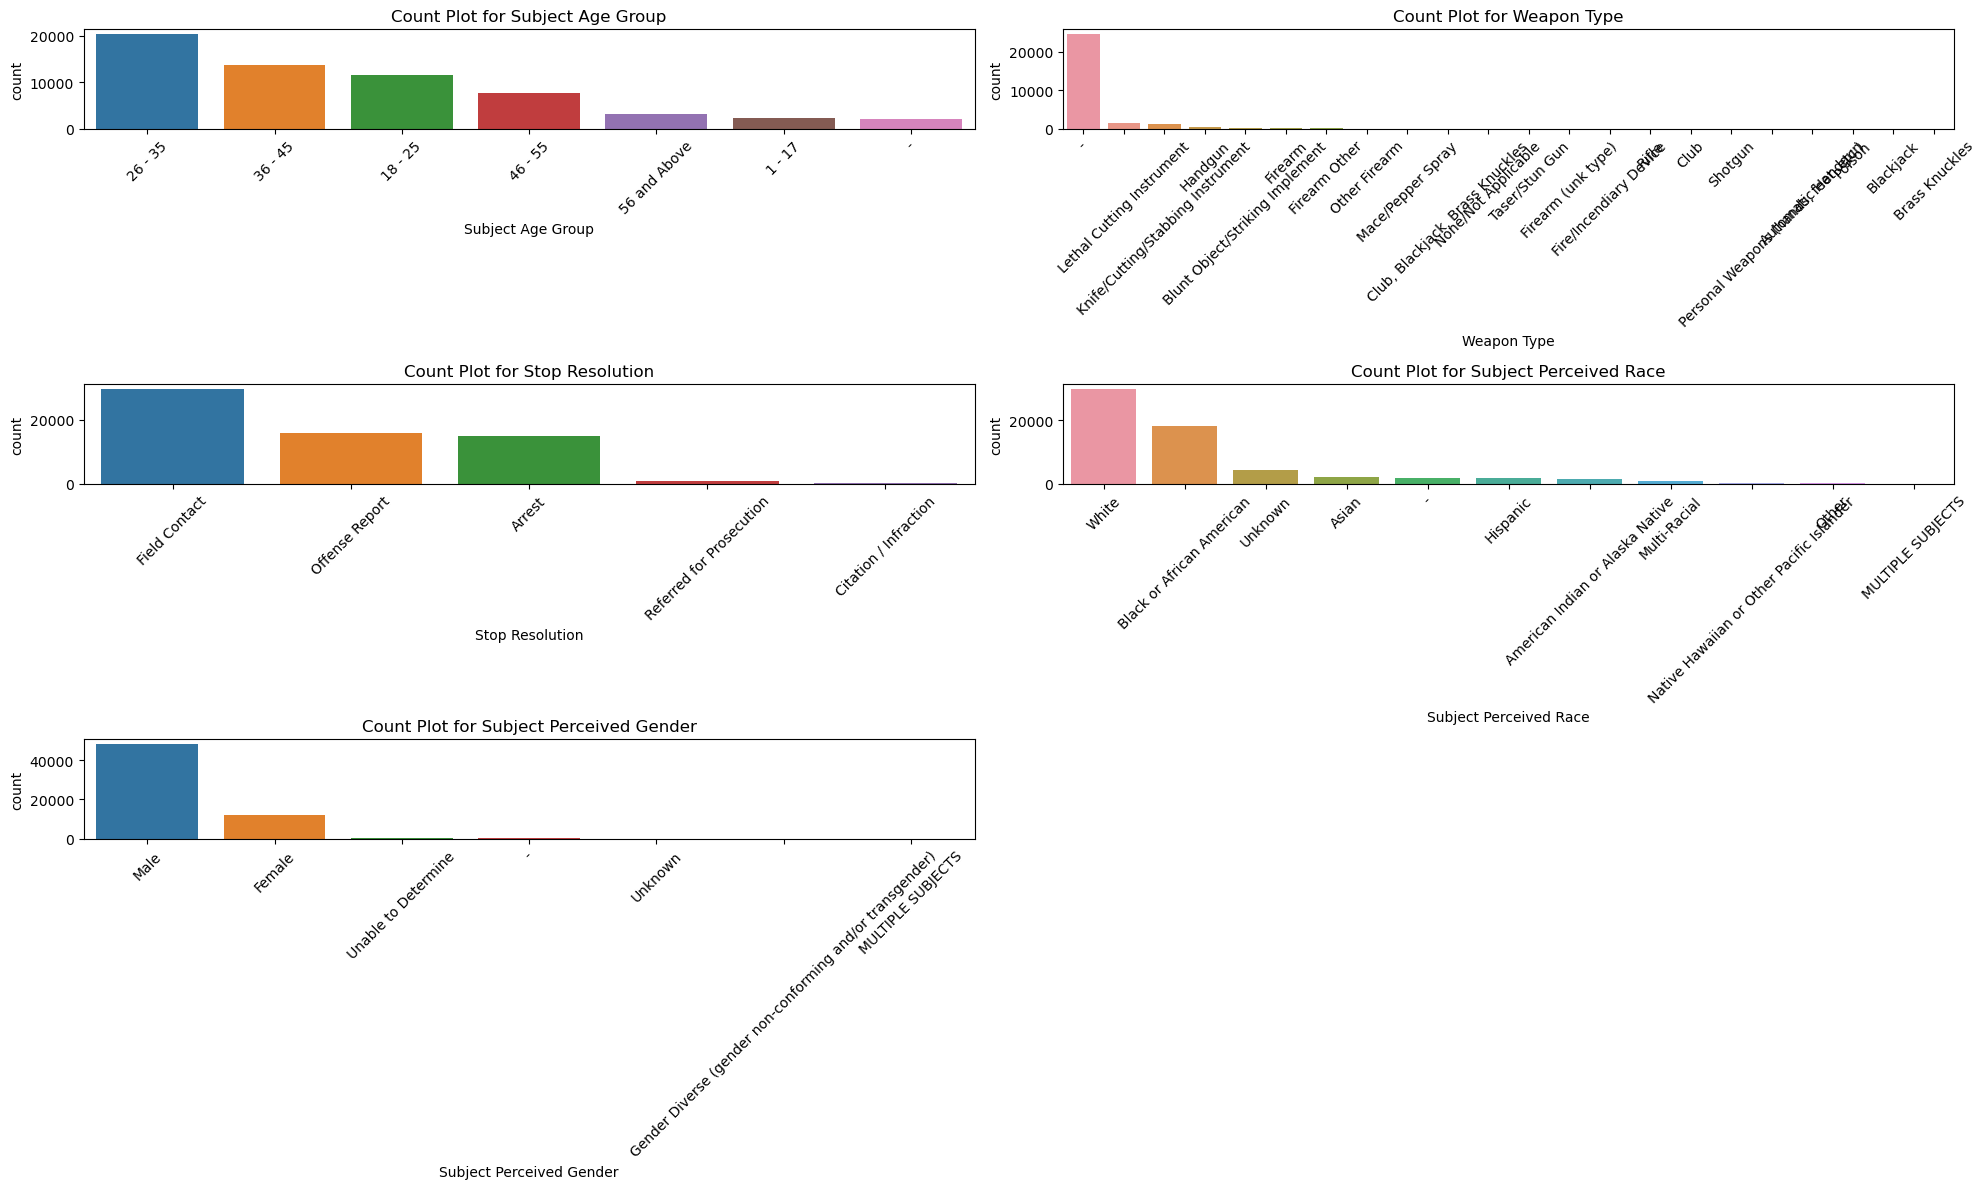

In [52]:
# Plot count plots for each categorical feature
plt.figure(figsize=(20, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, data=terry_df, order=terry_df[col].value_counts().index)
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze the Distribution of the Target Variable (Arrest Flag)

We will use crosstabs to summarize the relationship between each categorical feature and the "Arrest Flag" and bar plots to visualize the proportion of arrests within each category of the features.

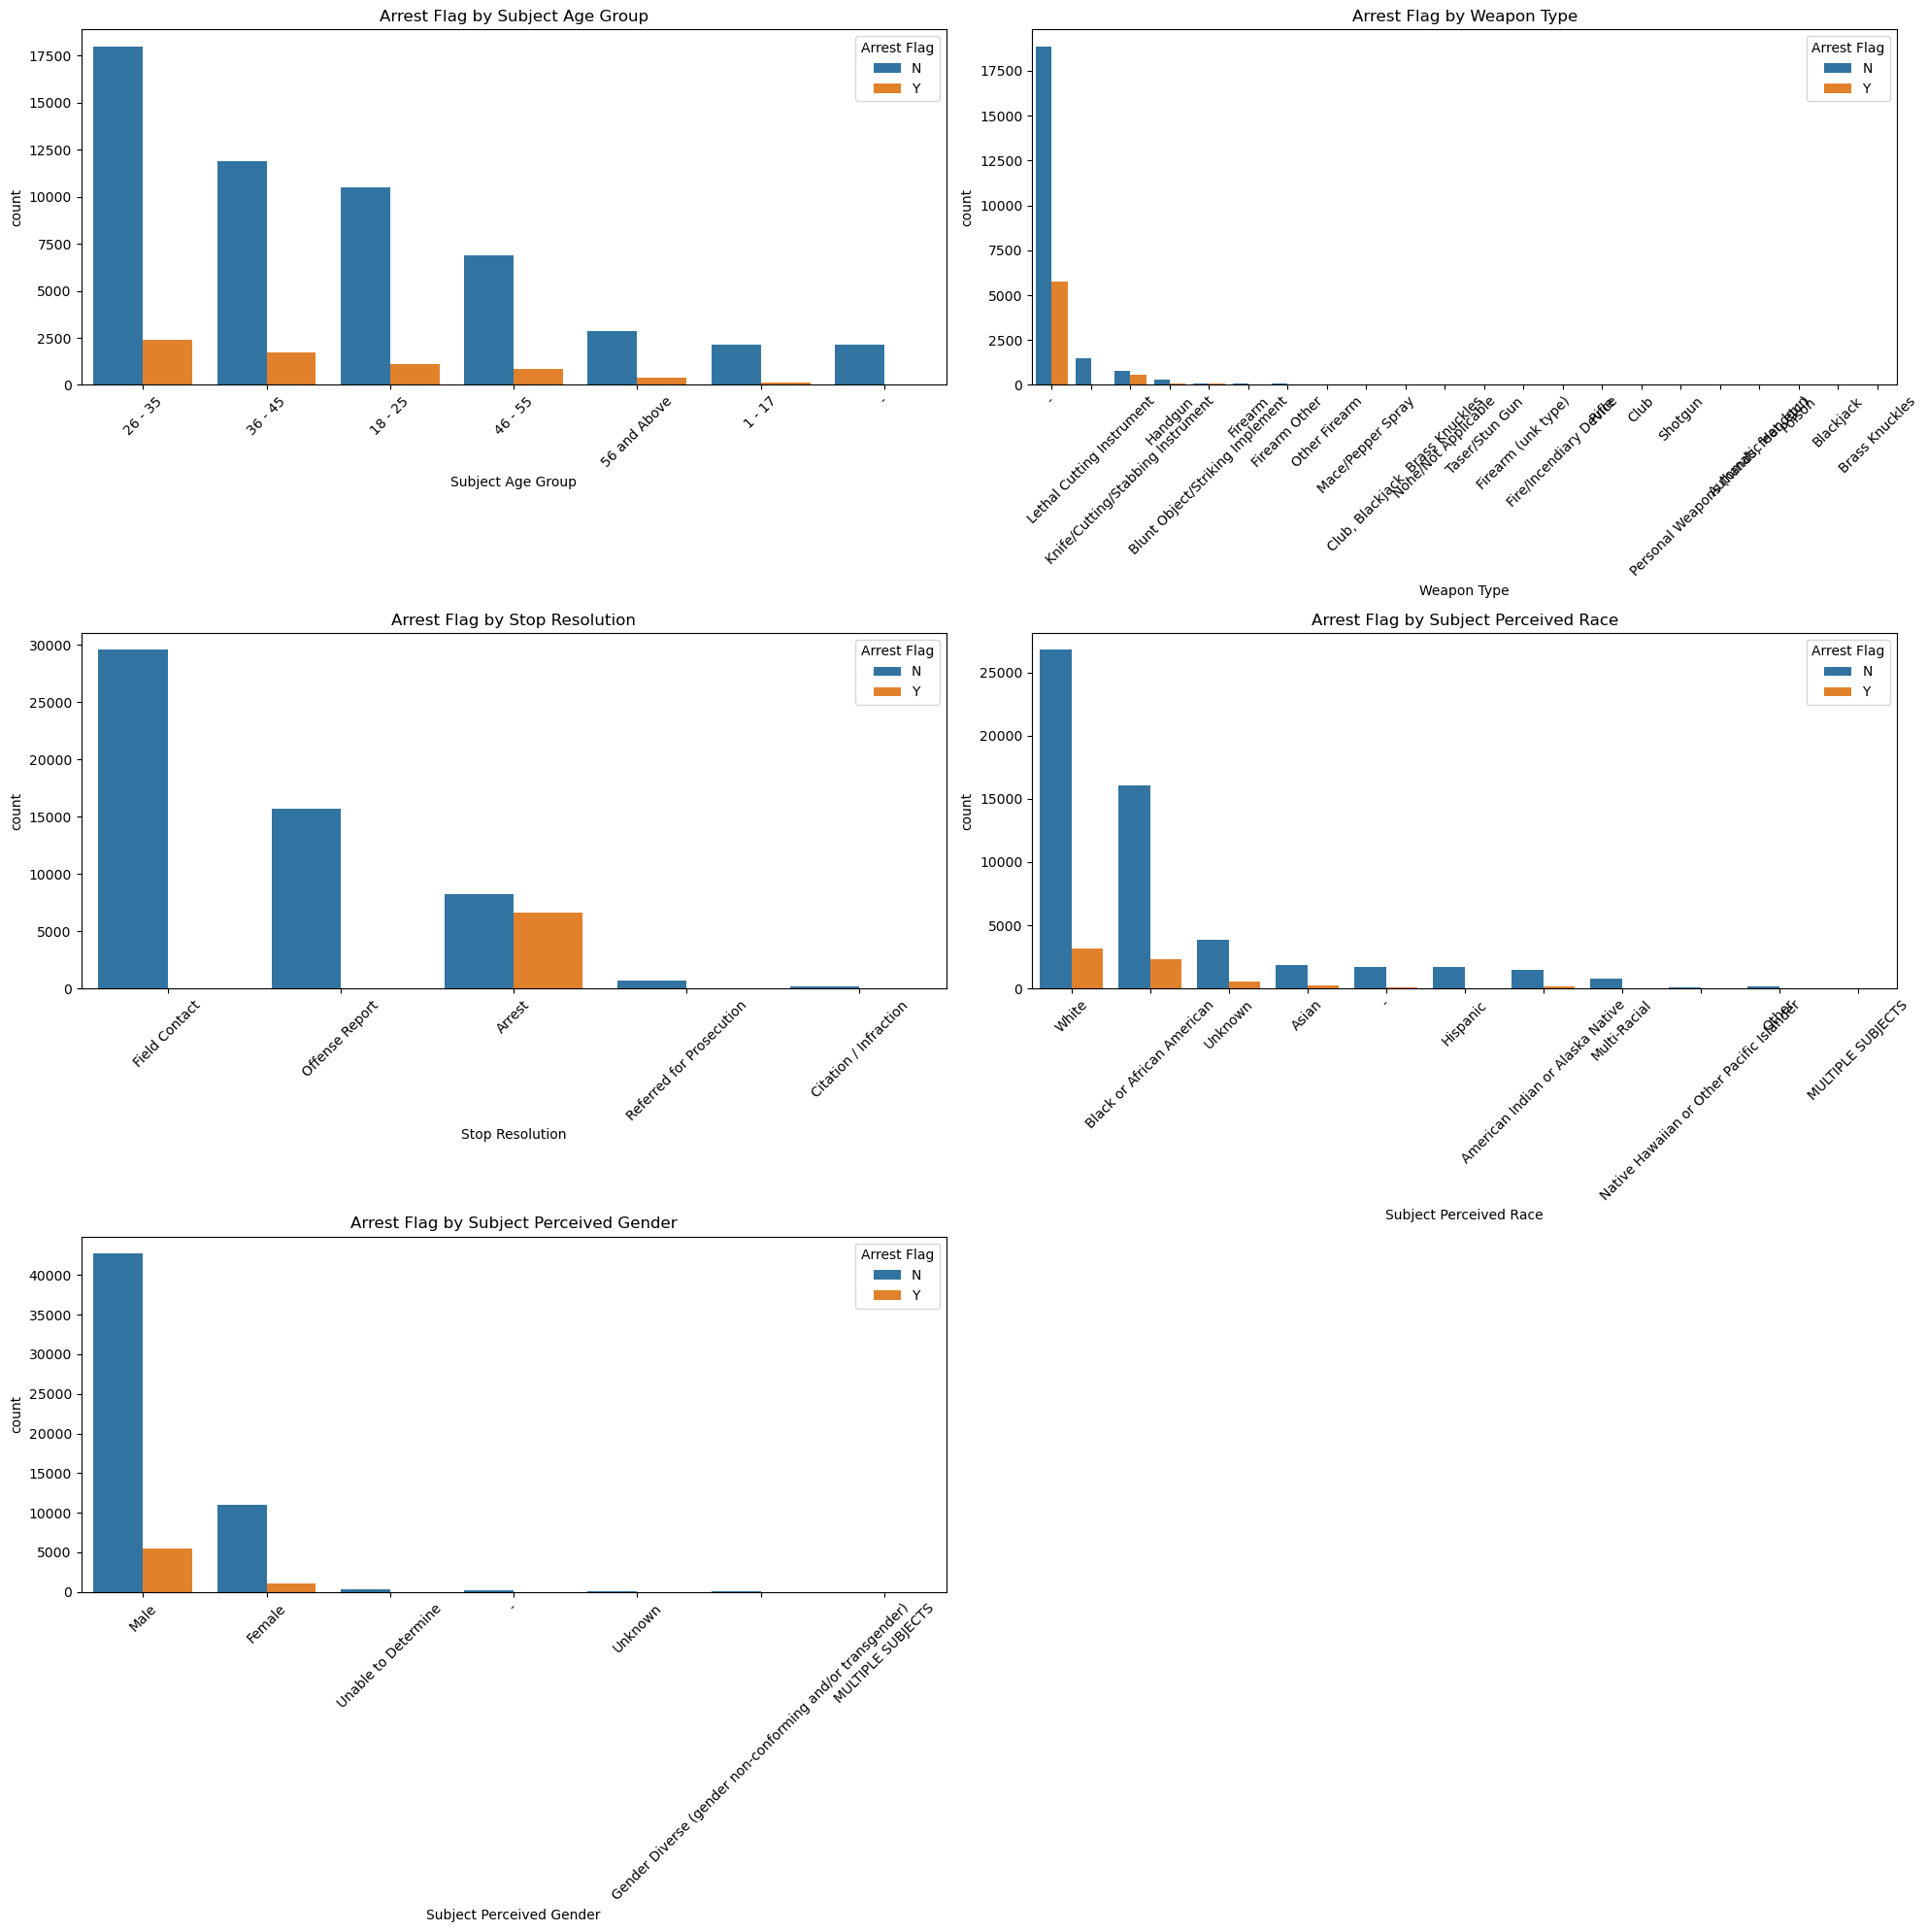

In [53]:
# Create bar plots for each categorical feature against the "Arrest Flag"
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, hue='Arrest Flag', data=terry_df, order=terry_df[col].value_counts().index)
    plt.title(f"Arrest Flag by {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [54]:
# Print crosstab for each categorical feature with "Arrest Flag"
for col in categorical_cols:
    crosstab_result = pd.crosstab(terry_df[col], terry_df['Arrest Flag'])
    print(f"Crosstab for {col} with Arrest Flag:\n", crosstab_result, "\n")

Crosstab for Subject Age Group with Arrest Flag:
 Arrest Flag            N     Y
Subject Age Group             
-                   2160    41
1 - 17              2155   131
18 - 25            10497  1085
26 - 35            18002  2387
36 - 45            11893  1735
46 - 55             6897   845
56 and Above        2856   366 

Crosstab for Weapon Type with Arrest Flag:
 Arrest Flag                               N     Y
Weapon Type                                      
-                                     18861  5748
Automatic Handgun                         2     0
Blackjack                                 1     0
Blunt Object/Striking Implement          95    81
Brass Knuckles                            1     0
Club                                      9     0
Club, Blackjack, Brass Knuckles          49     0
Fire/Incendiary Device                    7     6
Firearm                                  60    49
Firearm (unk type)                       15     0
Firearm Other            

## Statistical tests to validate the significance of observed patterns
We are using Chi-square Test for Independence

In [55]:
from scipy.stats import chi2_contingency

# Performing Chi-square test for 'Subject Perceived Race' and 'Arrest Flag'
contingency_table = pd.crosstab(terry_df['Subject Perceived Race'], terry_df['Arrest Flag'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Test Results for 'Subject Perceived Race' and 'Arrest Flag':\n Chi2: {chi2}, p-value: {p}")

# Interpretation of p-value
if p < 0.05:
    print("There is a significant association between 'Subject Perceived Race' and 'Arrest Flag'.")
else:
    print("No significant association between 'Subject Perceived Race' and 'Arrest Flag'.")

Chi-square Test Results for 'Subject Perceived Race' and 'Arrest Flag':
 Chi2: 503.15362641100324, p-value: 9.353668765101045e-102
There is a significant association between 'Subject Perceived Race' and 'Arrest Flag'.


In [56]:
# Performing Chi-square test for 'Subject Perceived Gender' and 'Arrest Flag'
contingency_table = pd.crosstab(terry_df['Subject Perceived Gender'], terry_df['Arrest Flag'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Test Results for 'Subject Perceived Gender' and 'Arrest Flag':\n Chi2: {chi2}, p-value: {p}")

# Interpretation of p-value
if p < 0.05:
    print("There is a significant association between 'Subject Perceived Gender' and 'Arrest Flag'.")
else:
    print("No significant association between 'Subject Perceived Gender' and 'Arrest Flag'.")

Chi-square Test Results for 'Subject Perceived Gender' and 'Arrest Flag':
 Chi2: 132.59728273046457, p-value: 3.647072311038753e-26
There is a significant association between 'Subject Perceived Gender' and 'Arrest Flag'.


In [57]:
# Performing Chi-square test for 'Stop Resolution' and 'Arrest Flag'
contingency_table = pd.crosstab(terry_df['Stop Resolution'], terry_df['Arrest Flag'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Test Results for 'Stop Resolution' and 'Arrest Flag':\n Chi2: {chi2}, p-value: {p}")

# Interpretation of p-value
if p < 0.05:
    print("There is a significant association between 'Stop Resolution' and 'Arrest Flag'.")
else:
    print("No significant association between 'Stop Resolution' and 'Arrest Flag'.")

Chi-square Test Results for 'Stop Resolution' and 'Arrest Flag':
 Chi2: 23071.40163433658, p-value: 0.0
There is a significant association between 'Stop Resolution' and 'Arrest Flag'.


In [58]:
# Performing Chi-square test for 'Weapon Type' and 'Arrest Flag'
contingency_table = pd.crosstab(terry_df['Weapon Type'], terry_df['Arrest Flag'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Test Results for 'Weapon Type' and 'Arrest Flag':\n Chi2: {chi2}, p-value: {p}")

# Interpretation of p-value
if p < 0.05:
    print("There is a significant association between 'Weapon Type' and 'Arrest Flag'.")
else:
    print("No significant association between 'Weapon Type' and 'Arrest Flag'.")

Chi-square Test Results for 'Weapon Type' and 'Arrest Flag':
 Chi2: 866.3985890456624, p-value: 7.374640975944834e-170
There is a significant association between 'Weapon Type' and 'Arrest Flag'.


In [59]:
# Performing Chi-square test for 'Subject Age Group' and 'Arrest Flag'
contingency_table = pd.crosstab(terry_df['Subject Age Group'], terry_df['Arrest Flag'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Test Results for 'Subject Age Group' and 'Arrest Flag':\n Chi2: {chi2}, p-value: {p}")

# Interpretation of p-value
if p < 0.05:
    print("There is a significant association between 'Subject Age Group' and 'Arrest Flag'.")
else:
    print("No significant association between 'Subject Age Group' and 'Arrest Flag'.")

Chi-square Test Results for 'Subject Age Group' and 'Arrest Flag':
 Chi2: 339.60818980749343, p-value: 2.6242186997924706e-70
There is a significant association between 'Subject Age Group' and 'Arrest Flag'.


### Data Processing and modelling


We calculate the mode of the "Weapon Type" column and use it to fill any missing values in that column.

In [60]:
# Calculate the mode for the specified column
mode_value = terry_df['Weapon Type'].mode()[0]

# Fill missing values in the specified column with its mode
terry_df['Weapon Type'].fillna(mode_value, inplace=True)

#  Check for missing values
terry_df.isnull().sum()

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               561
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64

After filling the specified column, we drop rows with any remaining missing values in other columns.

In [61]:
# Drop other null columns 
data_cleaned = terry_df.dropna()

data_cleaned.shape

(60489, 23)

In [62]:
# Check for missing values
data_cleaned.isnull().sum()

Subject Age Group           0
Subject ID                  0
GO / SC Num                 0
Terry Stop ID               0
Stop Resolution             0
Weapon Type                 0
Officer ID                  0
Officer YOB                 0
Officer Gender              0
Officer Race                0
Subject Perceived Race      0
Subject Perceived Gender    0
Reported Date               0
Reported Time               0
Initial Call Type           0
Final Call Type             0
Call Type                   0
Officer Squad               0
Arrest Flag                 0
Frisk Flag                  0
Precinct                    0
Sector                      0
Beat                        0
dtype: int64

## Encode Categorical Variables
I will use Label Encoding for simplicity, which converts each category to a unique integer.

In [63]:
from sklearn.preprocessing import LabelEncoder

# Categorical columns to encode
categorical_cols = ['Weapon Type', 'Stop Resolution', 'Subject Perceived Race', 'Subject Perceived Gender', 'Subject Age Group']

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode categorical columns
for col in categorical_cols:
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col].astype(str))
    
data_cleaned.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,1,-1,20170000315550,301338,3,0,5489,1964,M,White,...,00:10:00.0000000,NUISANCE,--MISCHIEF OR NUISANCE - GENERAL,911,NORTH PCT 3RD W - B/N RELIEF,N,N,North,N,N2
1,3,-1,20170000115391,253596,3,0,6403,1969,M,White,...,16:04:00.0000000,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - ALL OTHER,"TELEPHONE OTHER, NOT 911",NORTH PCT 2ND W - LINCOLN - PLATOON 1,N,N,North,L,L3
2,2,-1,20160000036392,123863,3,0,7473,1981,M,White,...,02:26:00.0000000,"SUSPICIOUS PERSON, VEHICLE, OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,NORTH PCT 3RD W - B/N RELIEF,N,N,North,B,B3
3,4,33919122751,20210000055627,21770133324,2,0,6711,1977,M,White,...,14:42:43.0000000,PROPERTY - DAMAGE,--DISTURBANCE - OTHER,911,SOUTHWEST PCT 2ND W - WILLIAM - PLATOON 2,N,N,-,-,-
4,2,-1,20160000003522,183376,2,0,7090,1981,F,White,...,15:49:00.0000000,-,-,-,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,N,Y,-,-,-


## Feature Scaling and Splitting the data


In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Identify numerical columns
numerical_cols = data_cleaned.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols

['Subject Age Group',
 'Subject ID',
 'GO / SC Num',
 'Terry Stop ID',
 'Stop Resolution',
 'Weapon Type',
 'Officer YOB',
 'Subject Perceived Race',
 'Subject Perceived Gender']

In [65]:
scaler = StandardScaler()

# Scale numerical columns
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

data_cleaned.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-1.687588,-0.573644,-0.195411,-0.695710,1.086648,-0.254245,5489,-2.232744,M,White,...,00:10:00.0000000,NUISANCE,--MISCHIEF OR NUISANCE - GENERAL,911,NORTH PCT 3RD W - B/N RELIEF,N,N,North,N,N2
1,-0.196534,-0.573644,-0.195413,-0.695713,1.086648,-0.254245,6403,-1.680607,M,White,...,16:04:00.0000000,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - ALL OTHER,"TELEPHONE OTHER, NOT 911",NORTH PCT 2ND W - LINCOLN - PLATOON 1,N,N,North,L,L3
2,-0.942061,-0.573644,-0.311618,-0.695720,1.086648,-0.254245,7473,-0.355478,M,White,...,02:26:00.0000000,"SUSPICIOUS PERSON, VEHICLE, OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,NORTH PCT 3RD W - B/N RELIEF,N,N,North,B,B3
3,0.548992,2.085741,0.269399,0.541959,0.187416,-0.254245,6711,-0.797188,M,White,...,14:42:43.0000000,PROPERTY - DAMAGE,--DISTURBANCE - OTHER,911,SOUTHWEST PCT 2ND W - WILLIAM - PLATOON 2,N,N,-,-,-
4,-0.942061,-0.573644,-0.311618,-0.695717,0.187416,-0.254245,7090,-0.355478,F,White,...,15:49:00.0000000,-,-,-,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,N,Y,-,-,-


In [66]:
# Split the data into features and target variable
X_categorical = data_cleaned[categorical_cols]
y = data_cleaned['Arrest Flag'] 

In [69]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_categorical, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (48391, 5)
Testing set size: (12098, 5)


## Model Building

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()

# Train Logistic Regression model
logistic_regression.fit(X_train, y_train)

# Train Decision Tree model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
# Predict on the test set with Logistic Regression
y_pred_lr = logistic_regression.predict(X_test)

In [76]:
# Predict on the test set with Decision Tree
y_pred_dt = decision_tree.predict(X_test)

In [77]:
# Evaluate Logistic Regression model
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Model Evaluation:
Accuracy: 0.8922962473136056
Classification Report:
               precision    recall  f1-score   support

           N       0.91      0.98      0.94     10817
           Y       0.48      0.19      0.27      1281

    accuracy                           0.89     12098
   macro avg       0.69      0.58      0.61     12098
weighted avg       0.86      0.89      0.87     12098

Confusion Matrix:
 [[10554   263]
 [ 1040   241]]


In [78]:
# Evaluate Decision Tree model
print("\nDecision Tree Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Model Evaluation:
Accuracy: 0.9100677797983138
Classification Report:
               precision    recall  f1-score   support

           N       0.94      0.96      0.95     10817
           Y       0.60      0.47      0.52      1281

    accuracy                           0.91     12098
   macro avg       0.77      0.71      0.74     12098
weighted avg       0.90      0.91      0.91     12098

Confusion Matrix:
 [[10414   403]
 [  685   596]]
